In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import datasets
from sklearn import metrics
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet

<h1> Hierarchical Clustering with Iris Dataset </h1>

In [5]:
# Loading datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df["Species"] = iris["target"]
iris_df["Species"] = iris_df["Species"].apply(lambda x: iris["target_names"][x])

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Remove the grain species from the DataFrame, save for later
new_iris = iris_df.drop(["Species"], axis=1)

<h2> Dendograms with the linkage methods: Single, Complete, Average and Ward </h2>

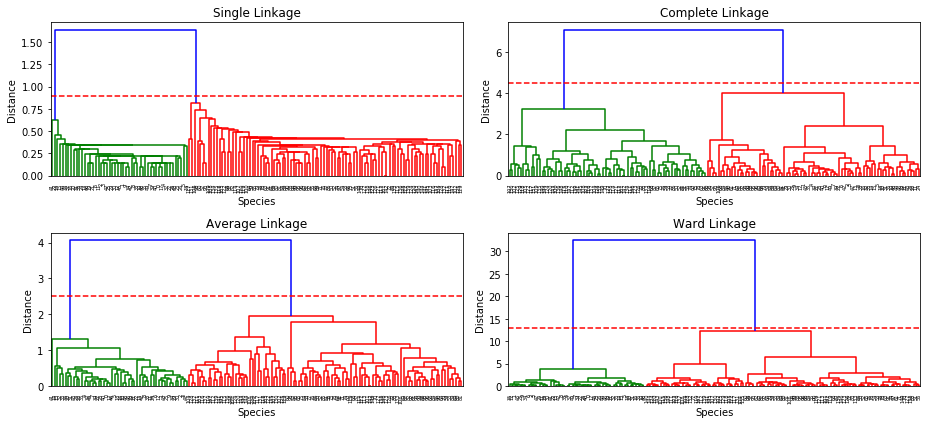

In [25]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(13,6))

plt.subplot(221)
plt.title('Single Linkage') 
shc.dendrogram((shc.linkage(new_iris, method='single'))) 
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xlabel('Species')
plt.ylabel('Distance')
plt.tight_layout()

plt.subplot(222)
plt.title('Complete Linkage') 
shc.dendrogram((shc.linkage(new_iris, method='complete'))) 
plt.axhline(y=4.5, color='r', linestyle='--')
plt.xlabel('Species')
plt.ylabel('Distance')
plt.tight_layout()

plt.subplot(223)
plt.title('Average Linkage') 
shc.dendrogram((shc.linkage(new_iris, method='average'))) 
plt.axhline(y=2.5, color='r', linestyle='--')
plt.xlabel('Species')
plt.ylabel('Distance')
plt.tight_layout()

plt.subplot(224)
plt.title('Ward Linkage') 
shc.dendrogram((shc.linkage(new_iris, method='ward'))) 
plt.axhline(y=13, color='r', linestyle='--')
plt.xlabel('Species')
plt.ylabel('Distance')
plt.tight_layout()

plt.show()

<h2> Applying PCA, TSN-E, and MDS to Iris Dataset </h2>

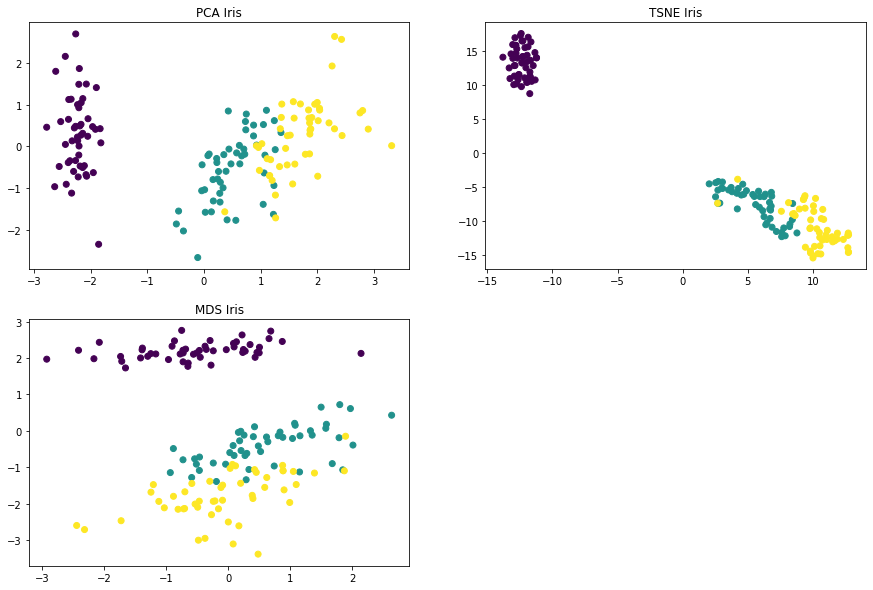

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS

scaler=StandardScaler()
scaler.fit(iris.data)
X_scaled=scaler.transform(iris.data)

pca=PCA(n_components=2) 
pca.fit(X_scaled) 
X_pca=pca.fit_transform(X_scaled) 
pc1 = X_pca[:,0]
pc2 = X_pca[:,1]

tsne = TSNE(n_components=2) 
tsne.fit(X_scaled) 
X_tsne = tsne.fit_transform(X_scaled) 
tsne1 = X_tsne[:,0]
tsne2 = X_tsne[:,1]

mds = MDS(n_components=2) 
mds.fit(X_scaled) 
X_mds = mds.fit_transform(X_scaled) 
mds1 = X_mds[:,0]
mds2 = X_mds[:,1]

plt.figure(figsize=(15,10))

plt.subplot (221)
plt.title('PCA Iris')
plt.scatter(pc1, pc2, c=iris['target'])

plt.subplot (222)
plt.title('TSNE Iris')
plt.scatter(tsne1, tsne2, c=iris['target'])

plt.subplot (223)
plt.title('MDS Iris')
plt.scatter(mds1, mds2, c=iris['target'])

plt.show()



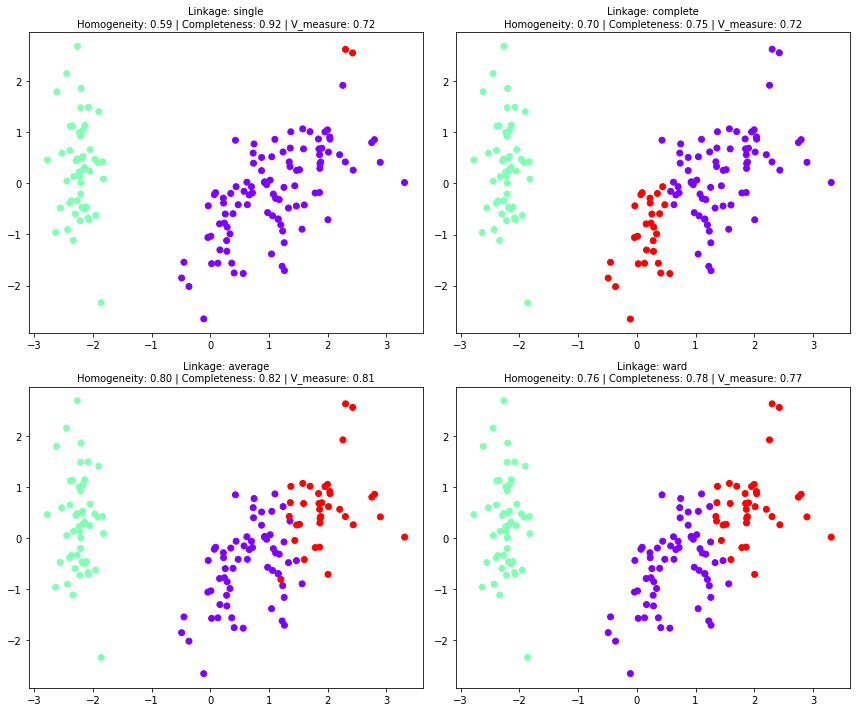

In [67]:
def calc_metrics(clf, y):
    h = metrics.homogeneity_score(y.ravel(), clf.labels_)
    c = metrics.completeness_score(y.ravel(), clf.labels_)
    v = metrics.v_measure_score(y.ravel(), clf.labels_)
    return h, c, v

def plot_linkage_methods(component1, component2):
    plt.figure(figsize=(12,10))
    i = 1
    for linkage_method in ['single', 'complete', 'average', 'ward']:
        cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=linkage_method)
        cluster.fit_predict(new_iris)

        h, c, v = calc_metrics(cluster, iris["target"])

        plt.subplot (2, 2, i)
        plt.title("Linkage: %(linkage)s\nHomogeneity: %(h).2f | Completeness: %(c).2f | V_measure: %(v).2f" % {
            'linkage': linkage_method, 'h': h, 'c': c, 'v': v
        }, size=10)

        plt.scatter(component1, component2, c=cluster.labels_, cmap='rainbow')
        plt.tight_layout()
        i = i+1

    plt.show()

<h3> Linkage methods with PCA </h3>

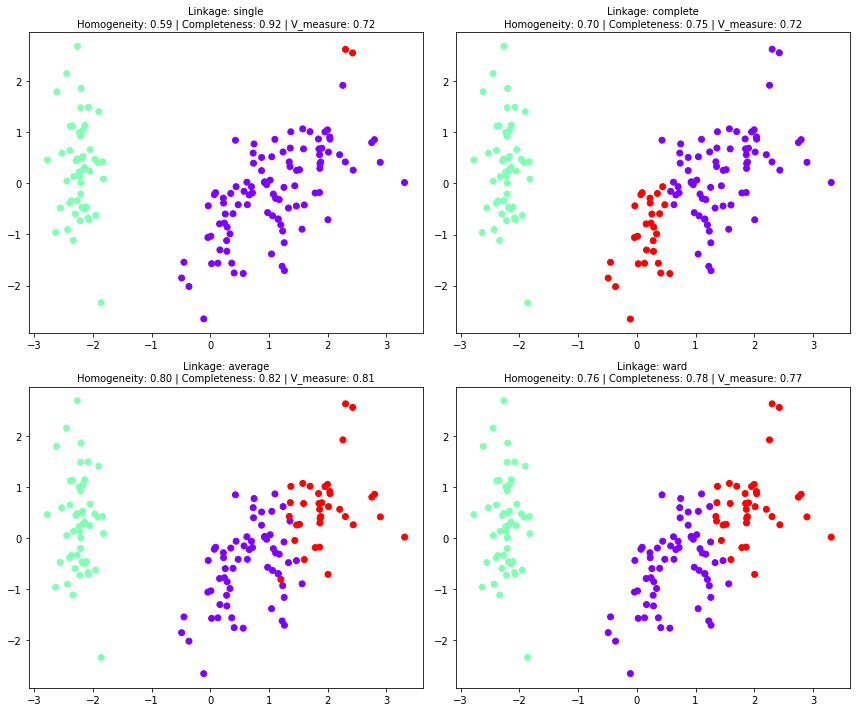

In [69]:
plot_linkage_methods(pc1, pc2)

<h3> Linkage methods with TSN-E </h3>

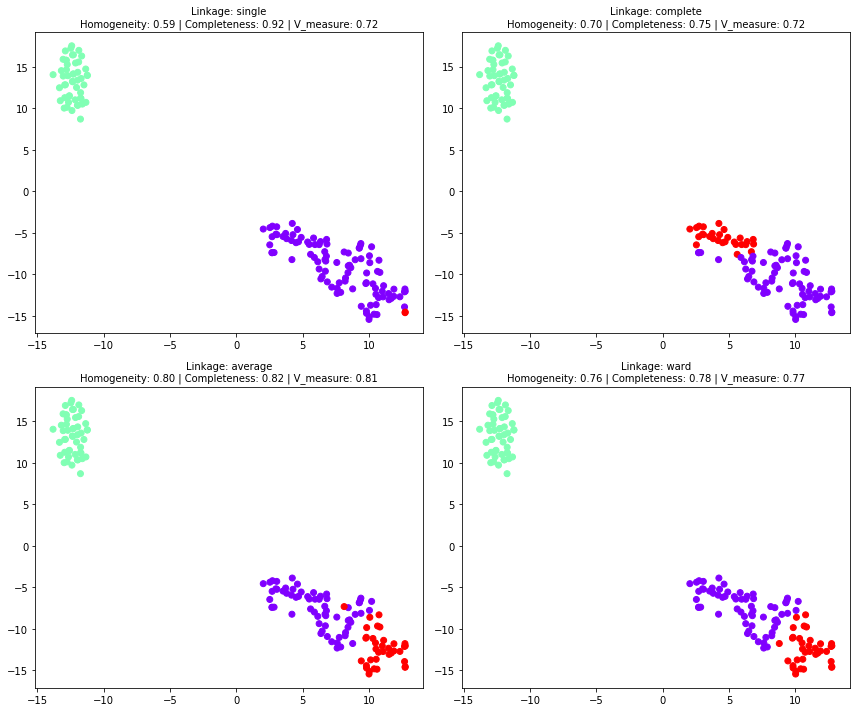

In [70]:
plot_linkage_methods(tsne1, tsne2)

<h3> Linkage methods with MDS </h3>

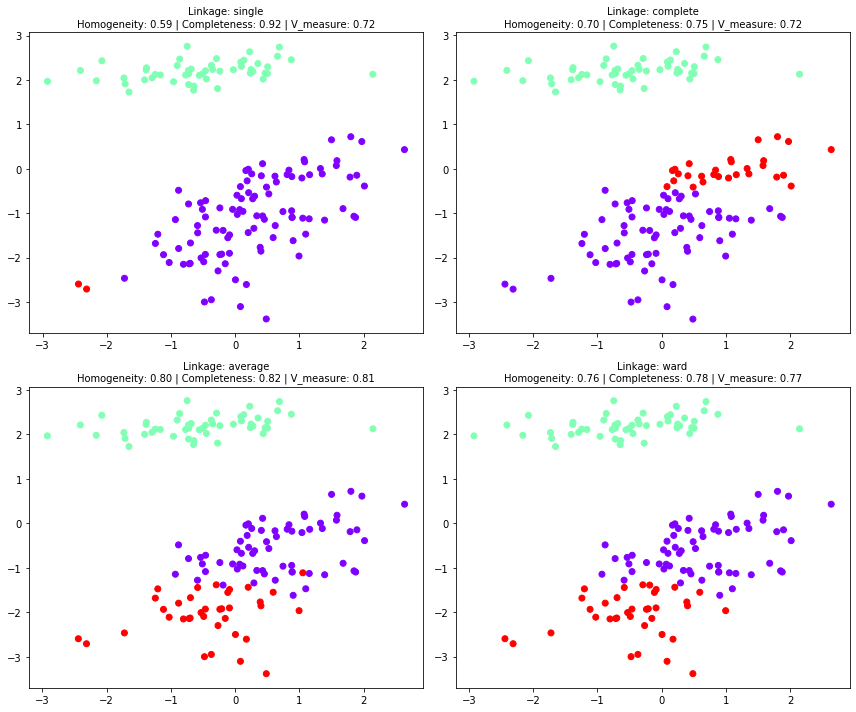

In [71]:
plot_linkage_methods(mds1, mds2)

<h2> Adding connectivity constraints </h2>

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 10 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


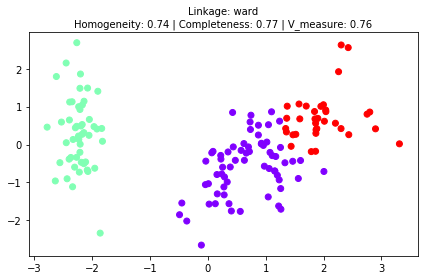

In [50]:
from sklearn.neighbors import kneighbors_graph

knn_graph = kneighbors_graph(X_pca, 2)  # connectivity graph with the 2 nearest neighbors
connectivity = knn_graph.toarray()
 
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward', 
                                  connectivity=connectivity)
cluster.fit_predict(new_iris)

h, c, v = calc_metrics(cluster, iris["target"])

plt.title("Linkage: %(linkage)s\nHomogeneity: %(h).2f | Completeness: %(c).2f | V_measure: %(v).2f" % {
    'linkage': 'ward', 'h': h, 'c': c, 'v': v
}, size=10)
plt.scatter(pc1,pc2, c=cluster.labels_, cmap='rainbow')
plt.tight_layout()

plt.show()